### Let's get started!

Import some required packages and print out the paths of the files

In [118]:
import pandas as pd
import sweetviz as sv
from IPython.display import IFrame
import seaborn as sns

import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename).replace(os.sep, '/'))

./data_display.html
./submission.csv
./test.csv
./titanic_submission.ipynb
./train.csv
./.ipynb_checkpoints/titanic_submission-checkpoint.ipynb


In [109]:
X_train = pd.read_csv("D:/kaggle/titanic/train.csv")
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [110]:
X_test = pd.read_csv("D:/kaggle/titanic/test.csv")
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [111]:
display_report = sv.analyze(X_train)
display_report.show_html('data_display.html')

In [112]:
IFrame(src = 'data_display.html', width = 950, height = 500)

### Effect of Gender

Let's see the effect of **Sex** on the survival rate of the passengers on the Titanic

<Axes: xlabel='Sex'>

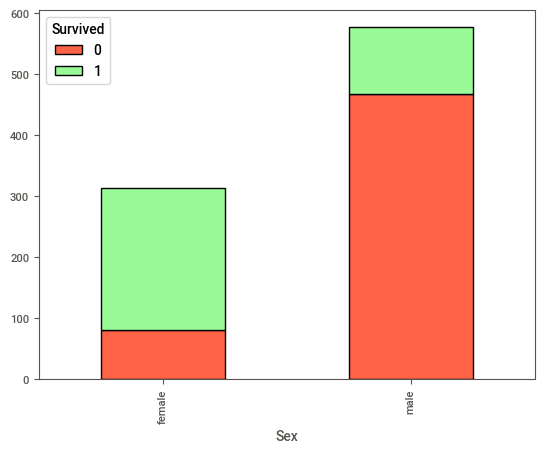

In [117]:
gender_data = X_train.groupby(['Sex', 'Survived']).size().unstack()
gender_data.plot(kind='bar', stacked=True, color=['#FF6347', '#98FB98'], edgecolor='black')

It's apparent that gender is a huge determining factor on whether a person survives or not.
So we will definitely be including it in our features!

In [99]:
X_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Make data usable

To make data usable for further analysis we will convert them into one hot encoding format

In [100]:
fare_bins = [0, 26, 60, float('inf')]
fare_labels = ['low', 'mid', 'high']

# 'Fare_Range' is one hot encoding format for 'Fare' column/feature
X_train['Fare_Range'] = pd.cut(X_train['Fare'], bins = fare_bins, labels=fare_labels, include_lowest=True, right=False)
# Similary for 'Cabin'
X_train['CabinCat'] = X_train['Cabin'].isna().astype(bool)

# We do the same for Test sets
X_test['Fare_Range'] = pd.cut(X_test['Fare'], bins=fare_bins, labels=fare_labels, include_lowest=True, right=False)
X_test['CabinCat'] = X_test['Cabin'].isna().astype(bool)

### Let's use Forest model for predictions

Now let's use *RandomForestClassifier* model which uses a forest of decision trees for making predictions on our training data

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [102]:
Y_train = X_train["Survived"]

features = ["Pclass", "Sex", "Parch", "Fare_Range", "CabinCat"]
X_train = pd.get_dummies(X_train[features])
X_test = pd.get_dummies(X_test[features])

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Logistic Regression (Linear Regression)

Using **LinearRegression** we will predict the outcomes

In [104]:
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=i)
    model = LogisticRegression()
    model.fit(X_train, Y_train)

    predictions = model.predict(X_test)

    accuracy = accuracy_score(Y_test, predictions)
    print("i value: {}; Accuracy: {:.6f}".format(i, accuracy))

# output = pd.DataFrame({'PassengerId': X_test.PassengerId, 'Survived': predictions})
# output.to_csv('submission.csv', index=False)
# print("Done!")

i value: 0; Accuracy: 0.793296
i value: 1; Accuracy: 0.790210
i value: 2; Accuracy: 0.798246
i value: 3; Accuracy: 0.747253
i value: 4; Accuracy: 0.726027
i value: 5; Accuracy: 0.813559
i value: 6; Accuracy: 0.808511
i value: 7; Accuracy: 0.783784
i value: 8; Accuracy: 0.866667
i value: 9; Accuracy: 0.791667


# Forests - decision trees

Using **RandomForestClassifier** we will predict the outcomes

In [105]:
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=i)
    model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
    model.fit(X_train, Y_train)

    predictions = model.predict(X_test)

    accuracy = accuracy_score(Y_test, predictions)
    print("i value: {}; Accuracy: {:.6f}".format(i, accuracy))

i value: 0; Accuracy: 0.684211
i value: 1; Accuracy: 0.800000
i value: 2; Accuracy: 0.583333
i value: 3; Accuracy: 1.000000
i value: 4; Accuracy: 1.000000
i value: 5; Accuracy: 1.000000
i value: 6; Accuracy: 0.600000
i value: 7; Accuracy: 1.000000
i value: 8; Accuracy: 0.666667
i value: 9; Accuracy: 1.000000
